In [32]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')

samples = samples_published + samples_new

def plot_fault_block(names,save=False,filename=None):
    smps = [smp for smp in samples if smp.name in names]
    
    nplots = len(names)
    height = nplots*1.5
    
    fig,axs = plt.subplots(nplots,sharex=True,dpi=300,figsize=(7.5,height))
    
    if len(names)==1:
        smp = smps[0]
        smp.kde(ax=axs)
        axs.set_title(smp.name)
        axs.set_xlim(100,4000)
    
    else:
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k])
            axs[k].set_title(smp.name)
            axs[k].set_xlim(100,4000)

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

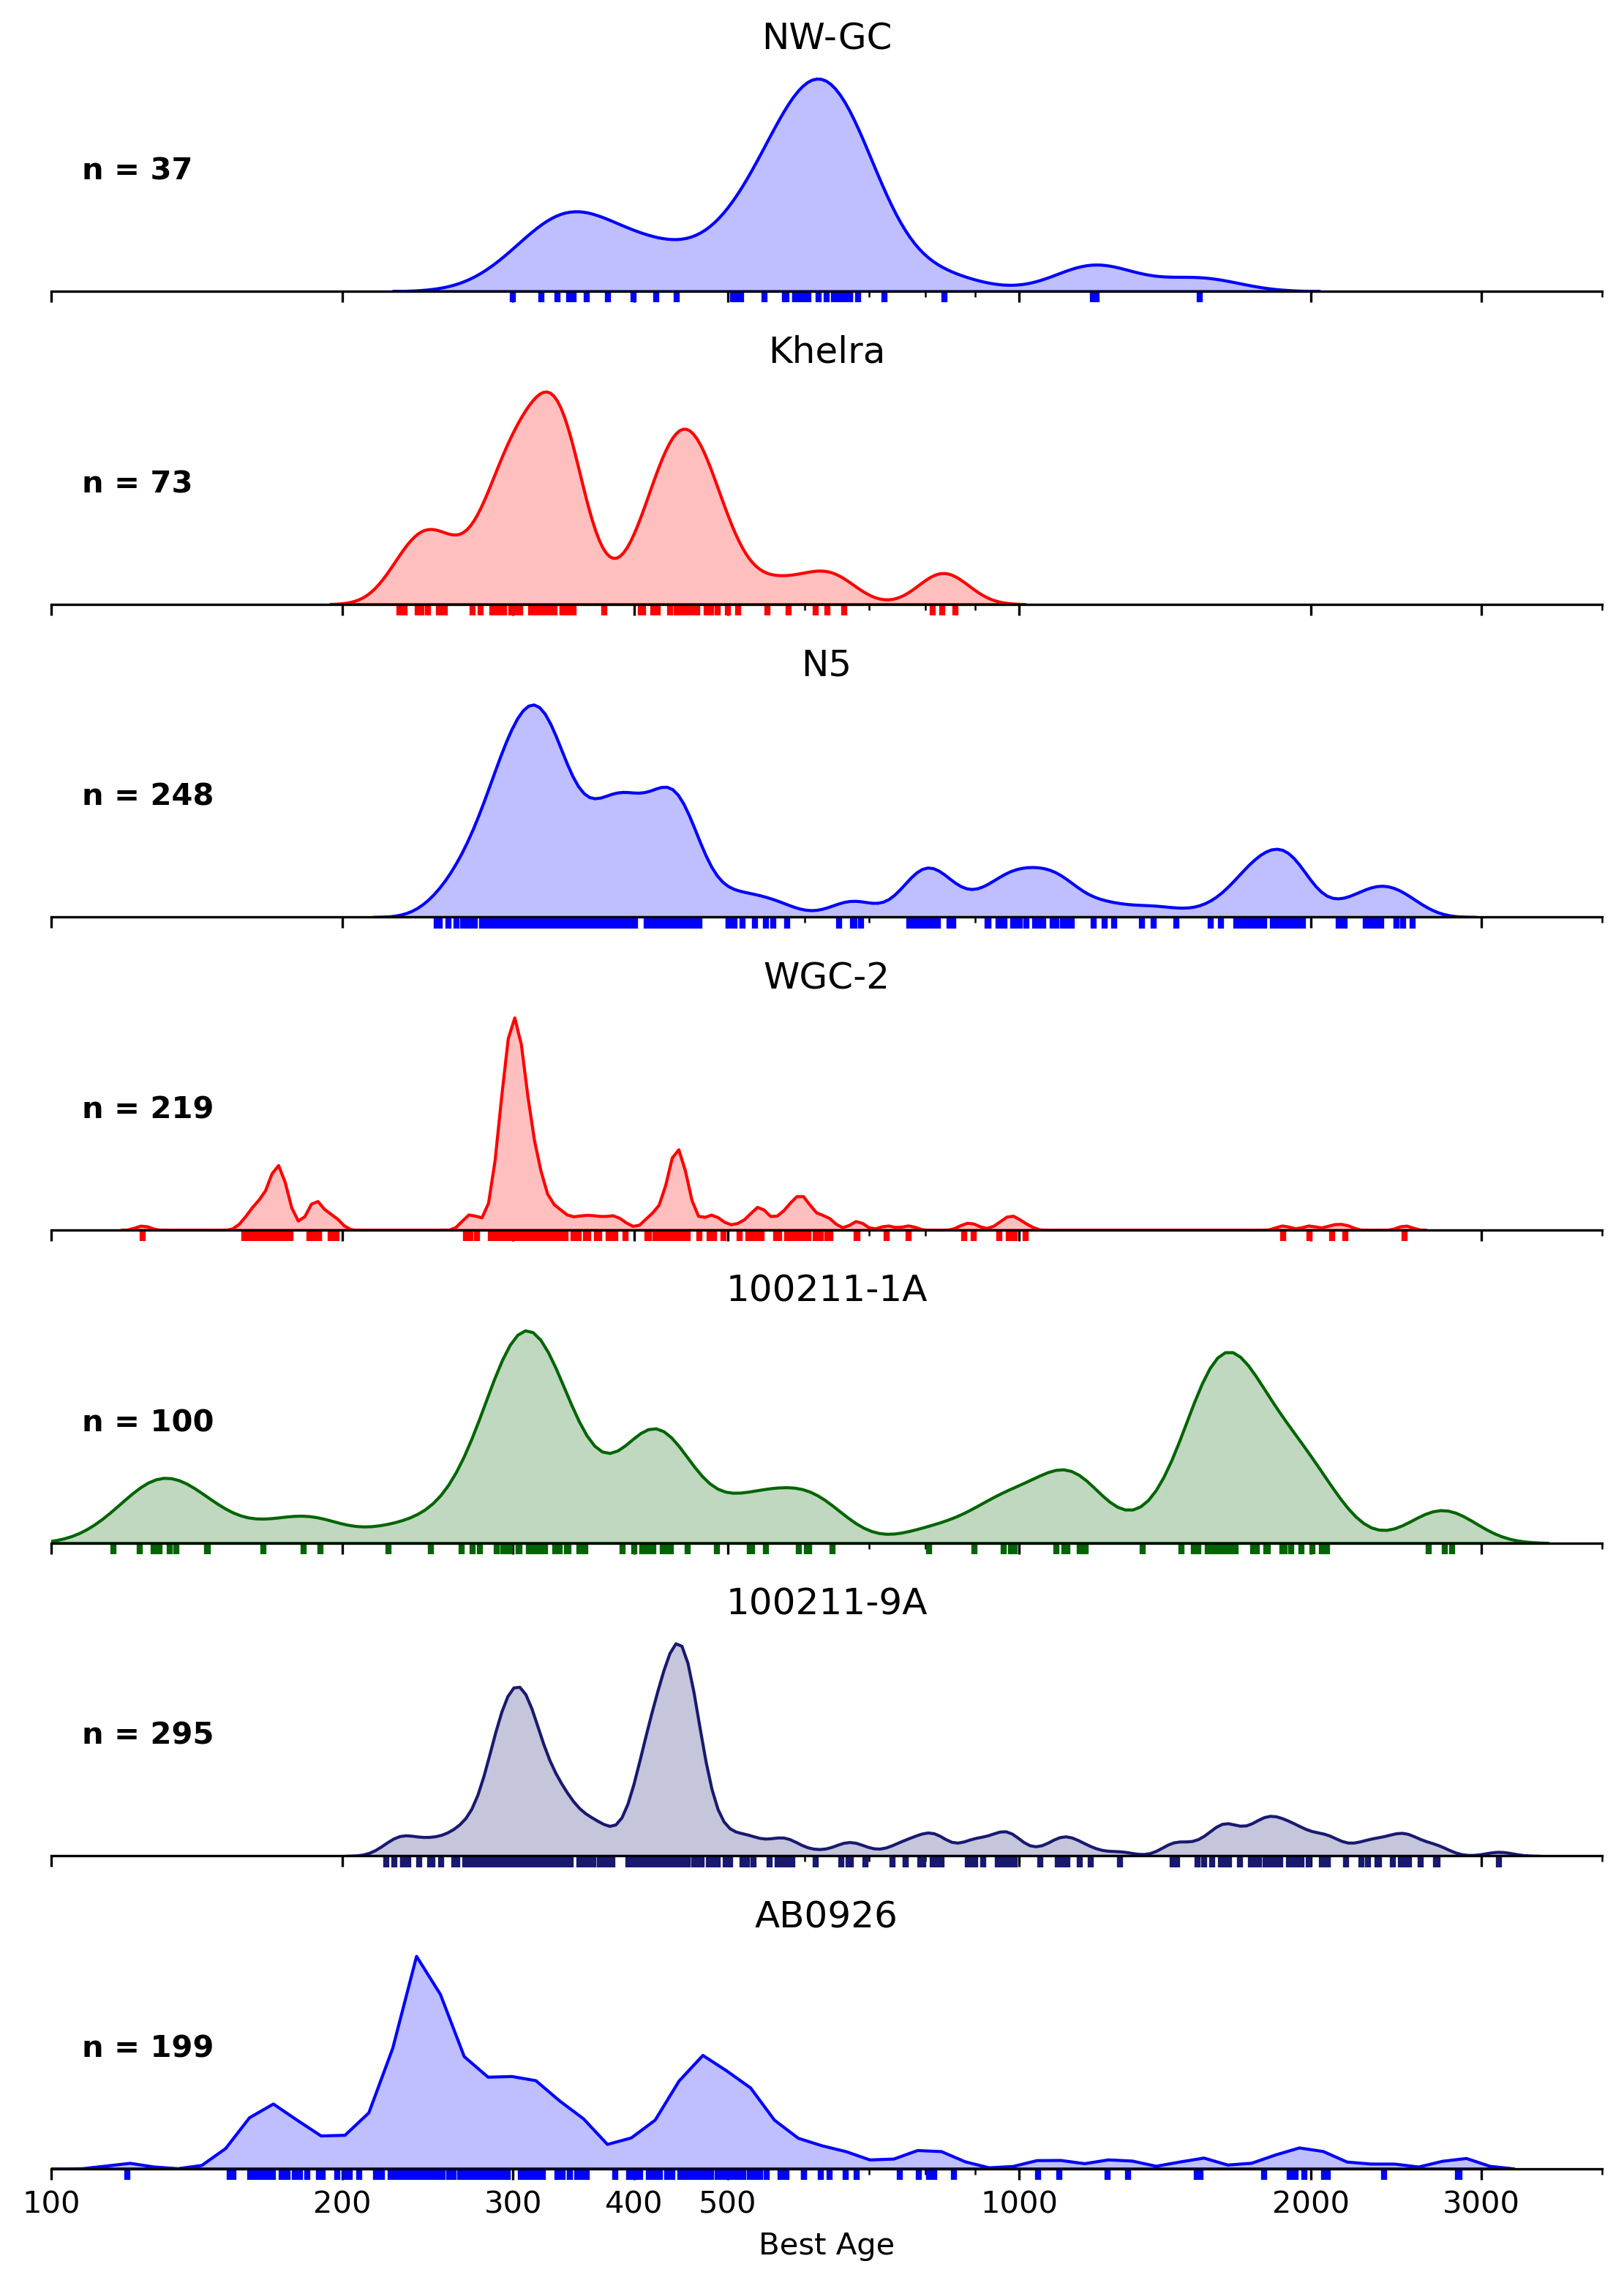

In [33]:
dizi_names = ['NW-GC','N5','Khelra','WGC-2','100211-9A','100211-1A','AB0926']

dizi_samples = plot_fault_block(dizi_names,save=True,filename='dizi_block.pdf')


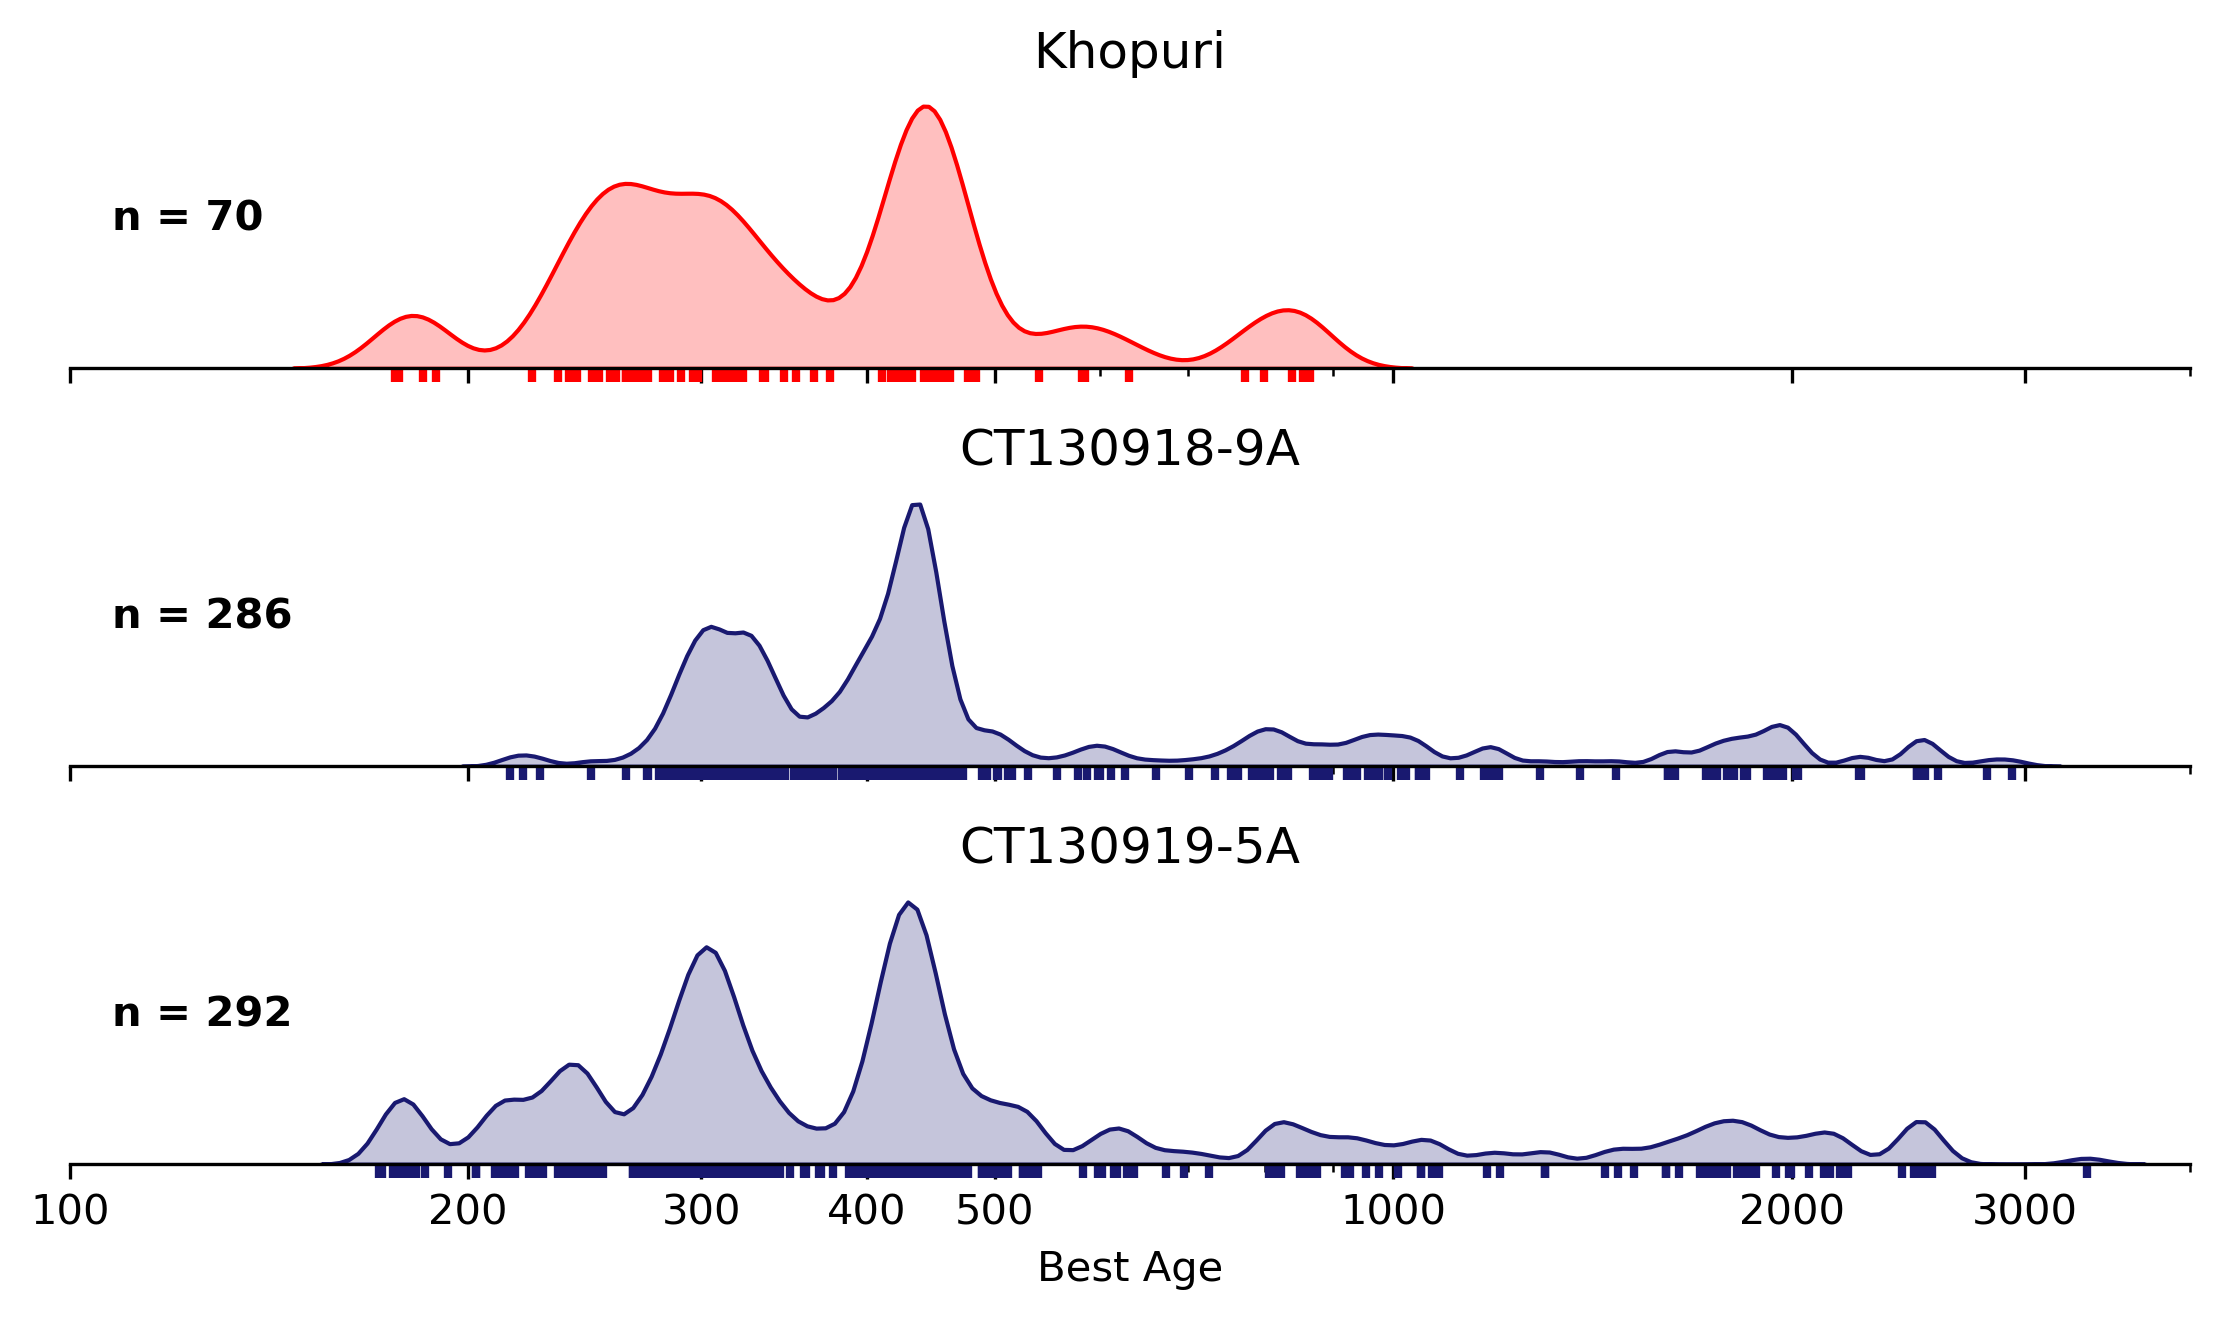

In [34]:
idliani_names = ['Khopuri','CT130918-9A','CT130919-5A']

plot_fault_block(idliani_names,save=True,filename='idliani_block.pdf')

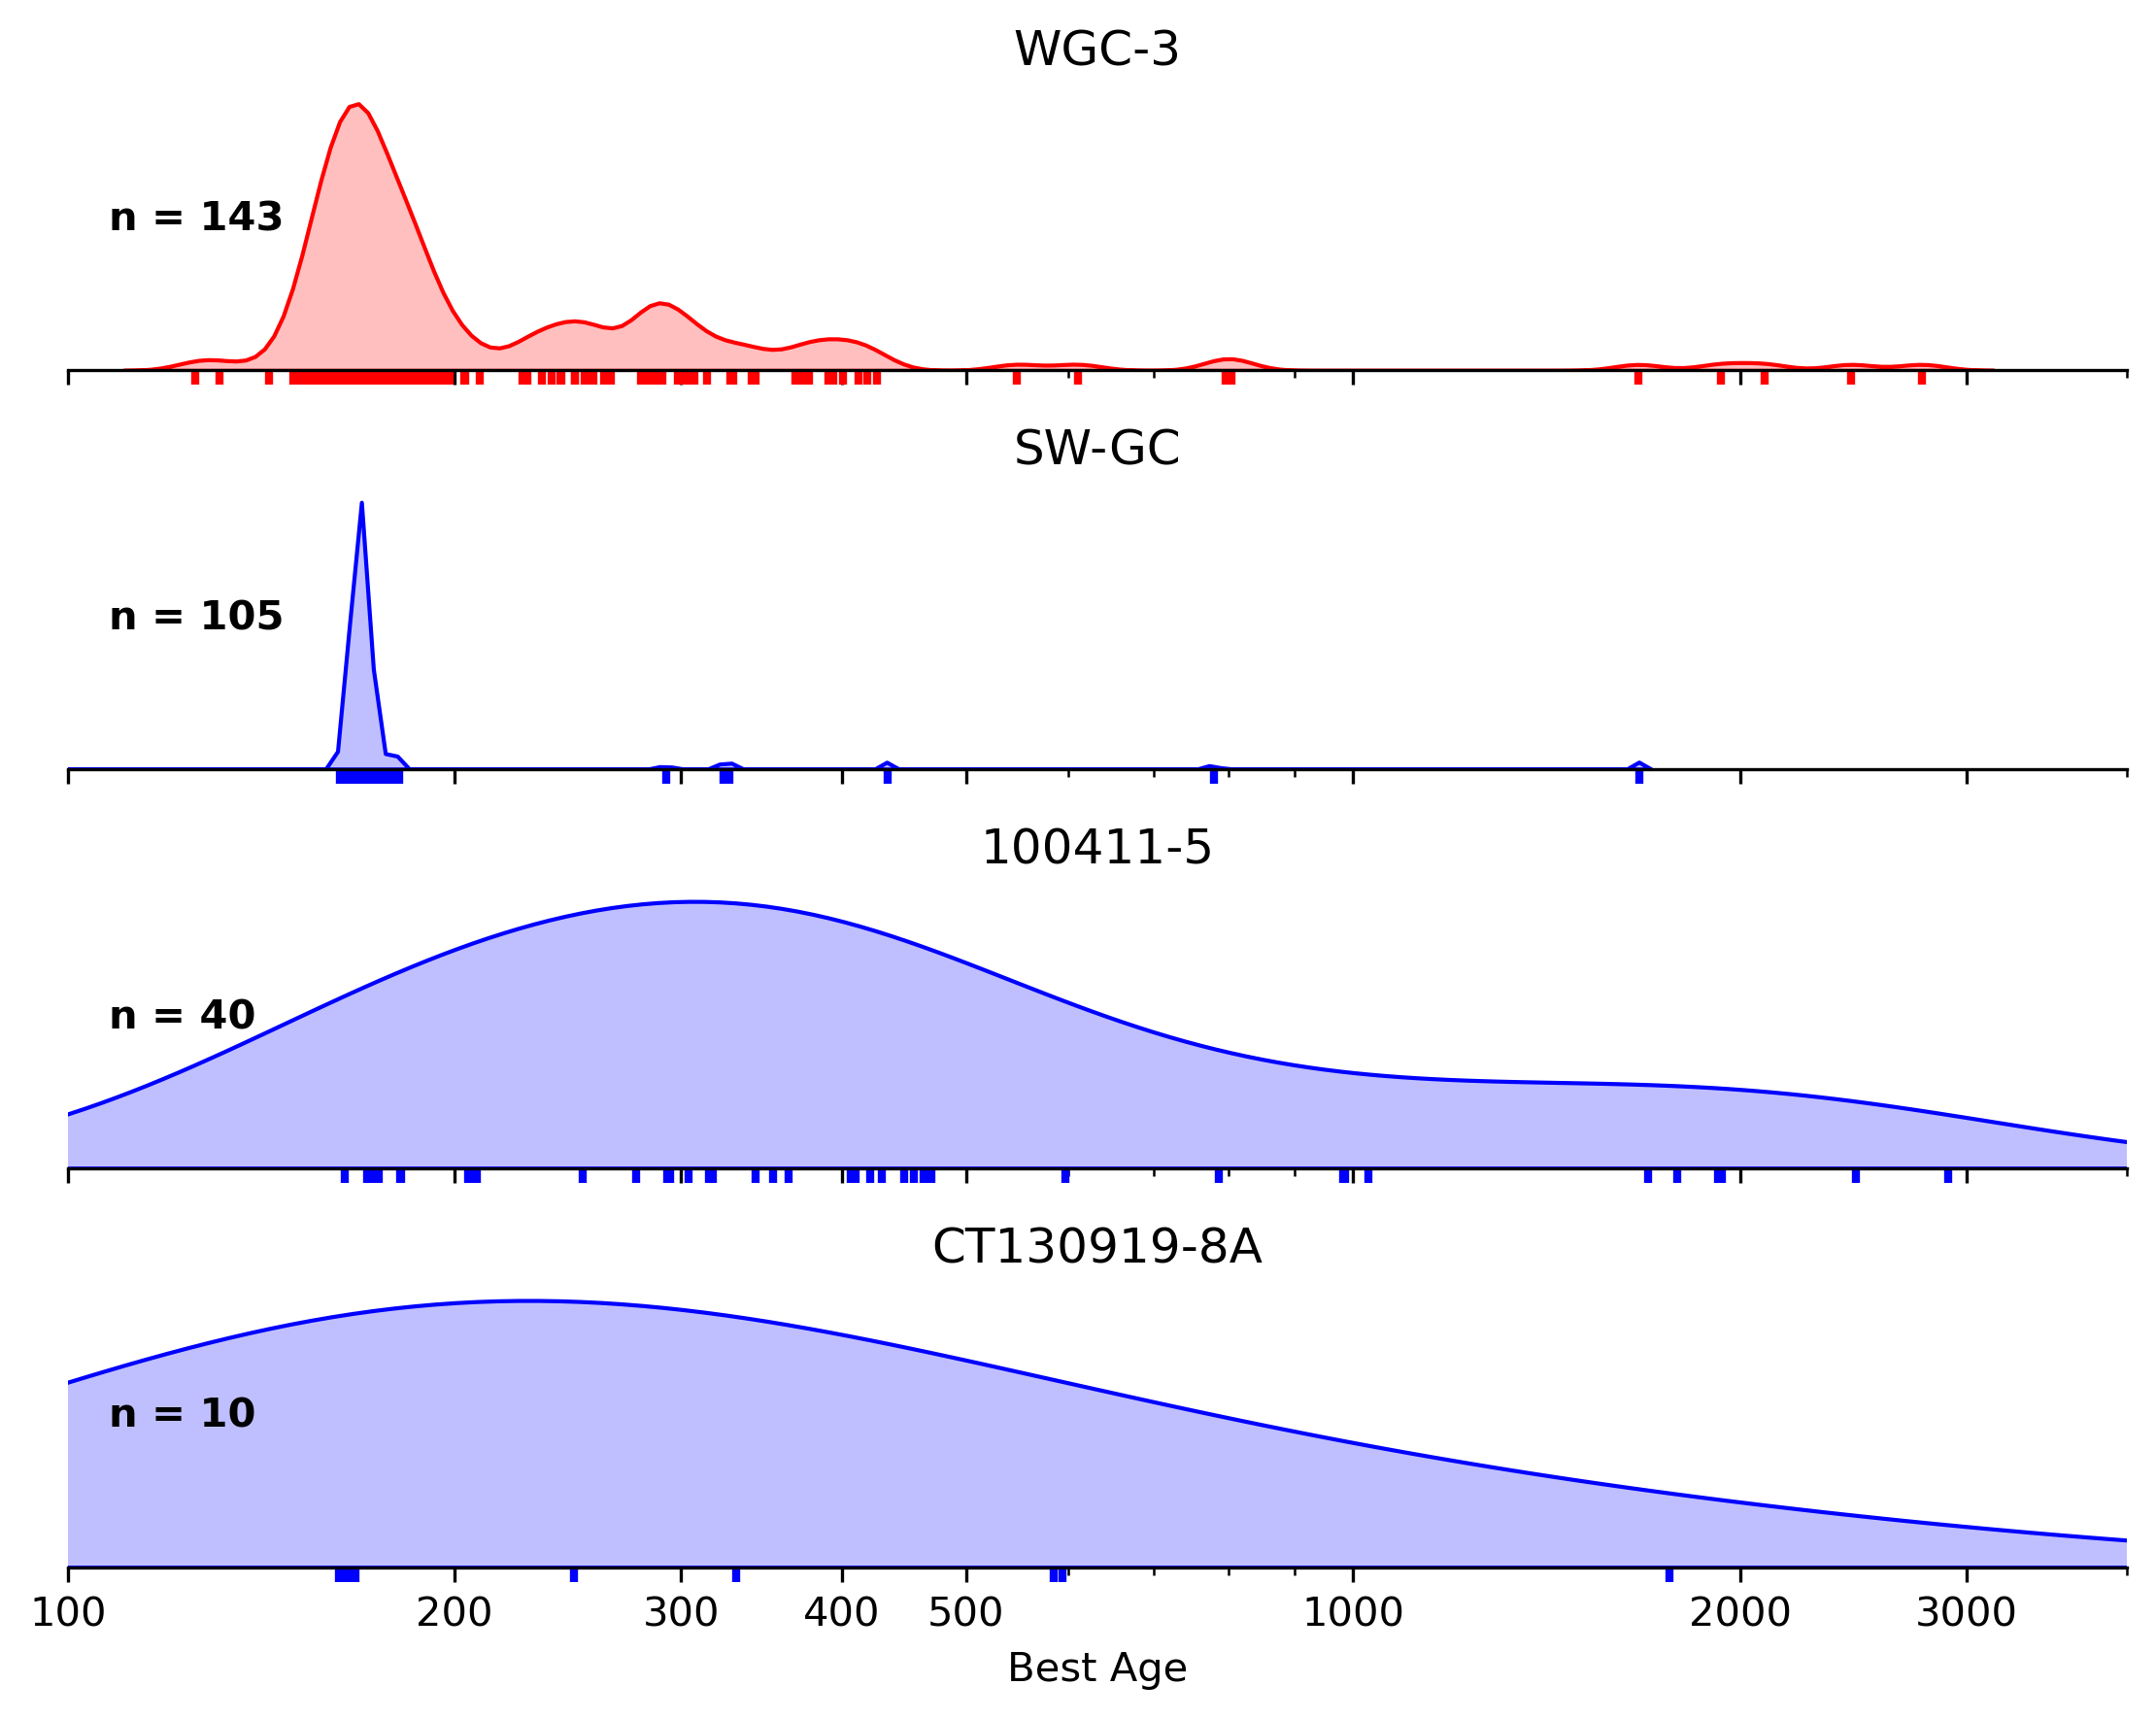

In [35]:
jvari_names = ['SW-GC','WGC-3','CT130919-8A','100411-5']

plot_fault_block(jvari_names,save=True,filename='jvari_block.pdf')

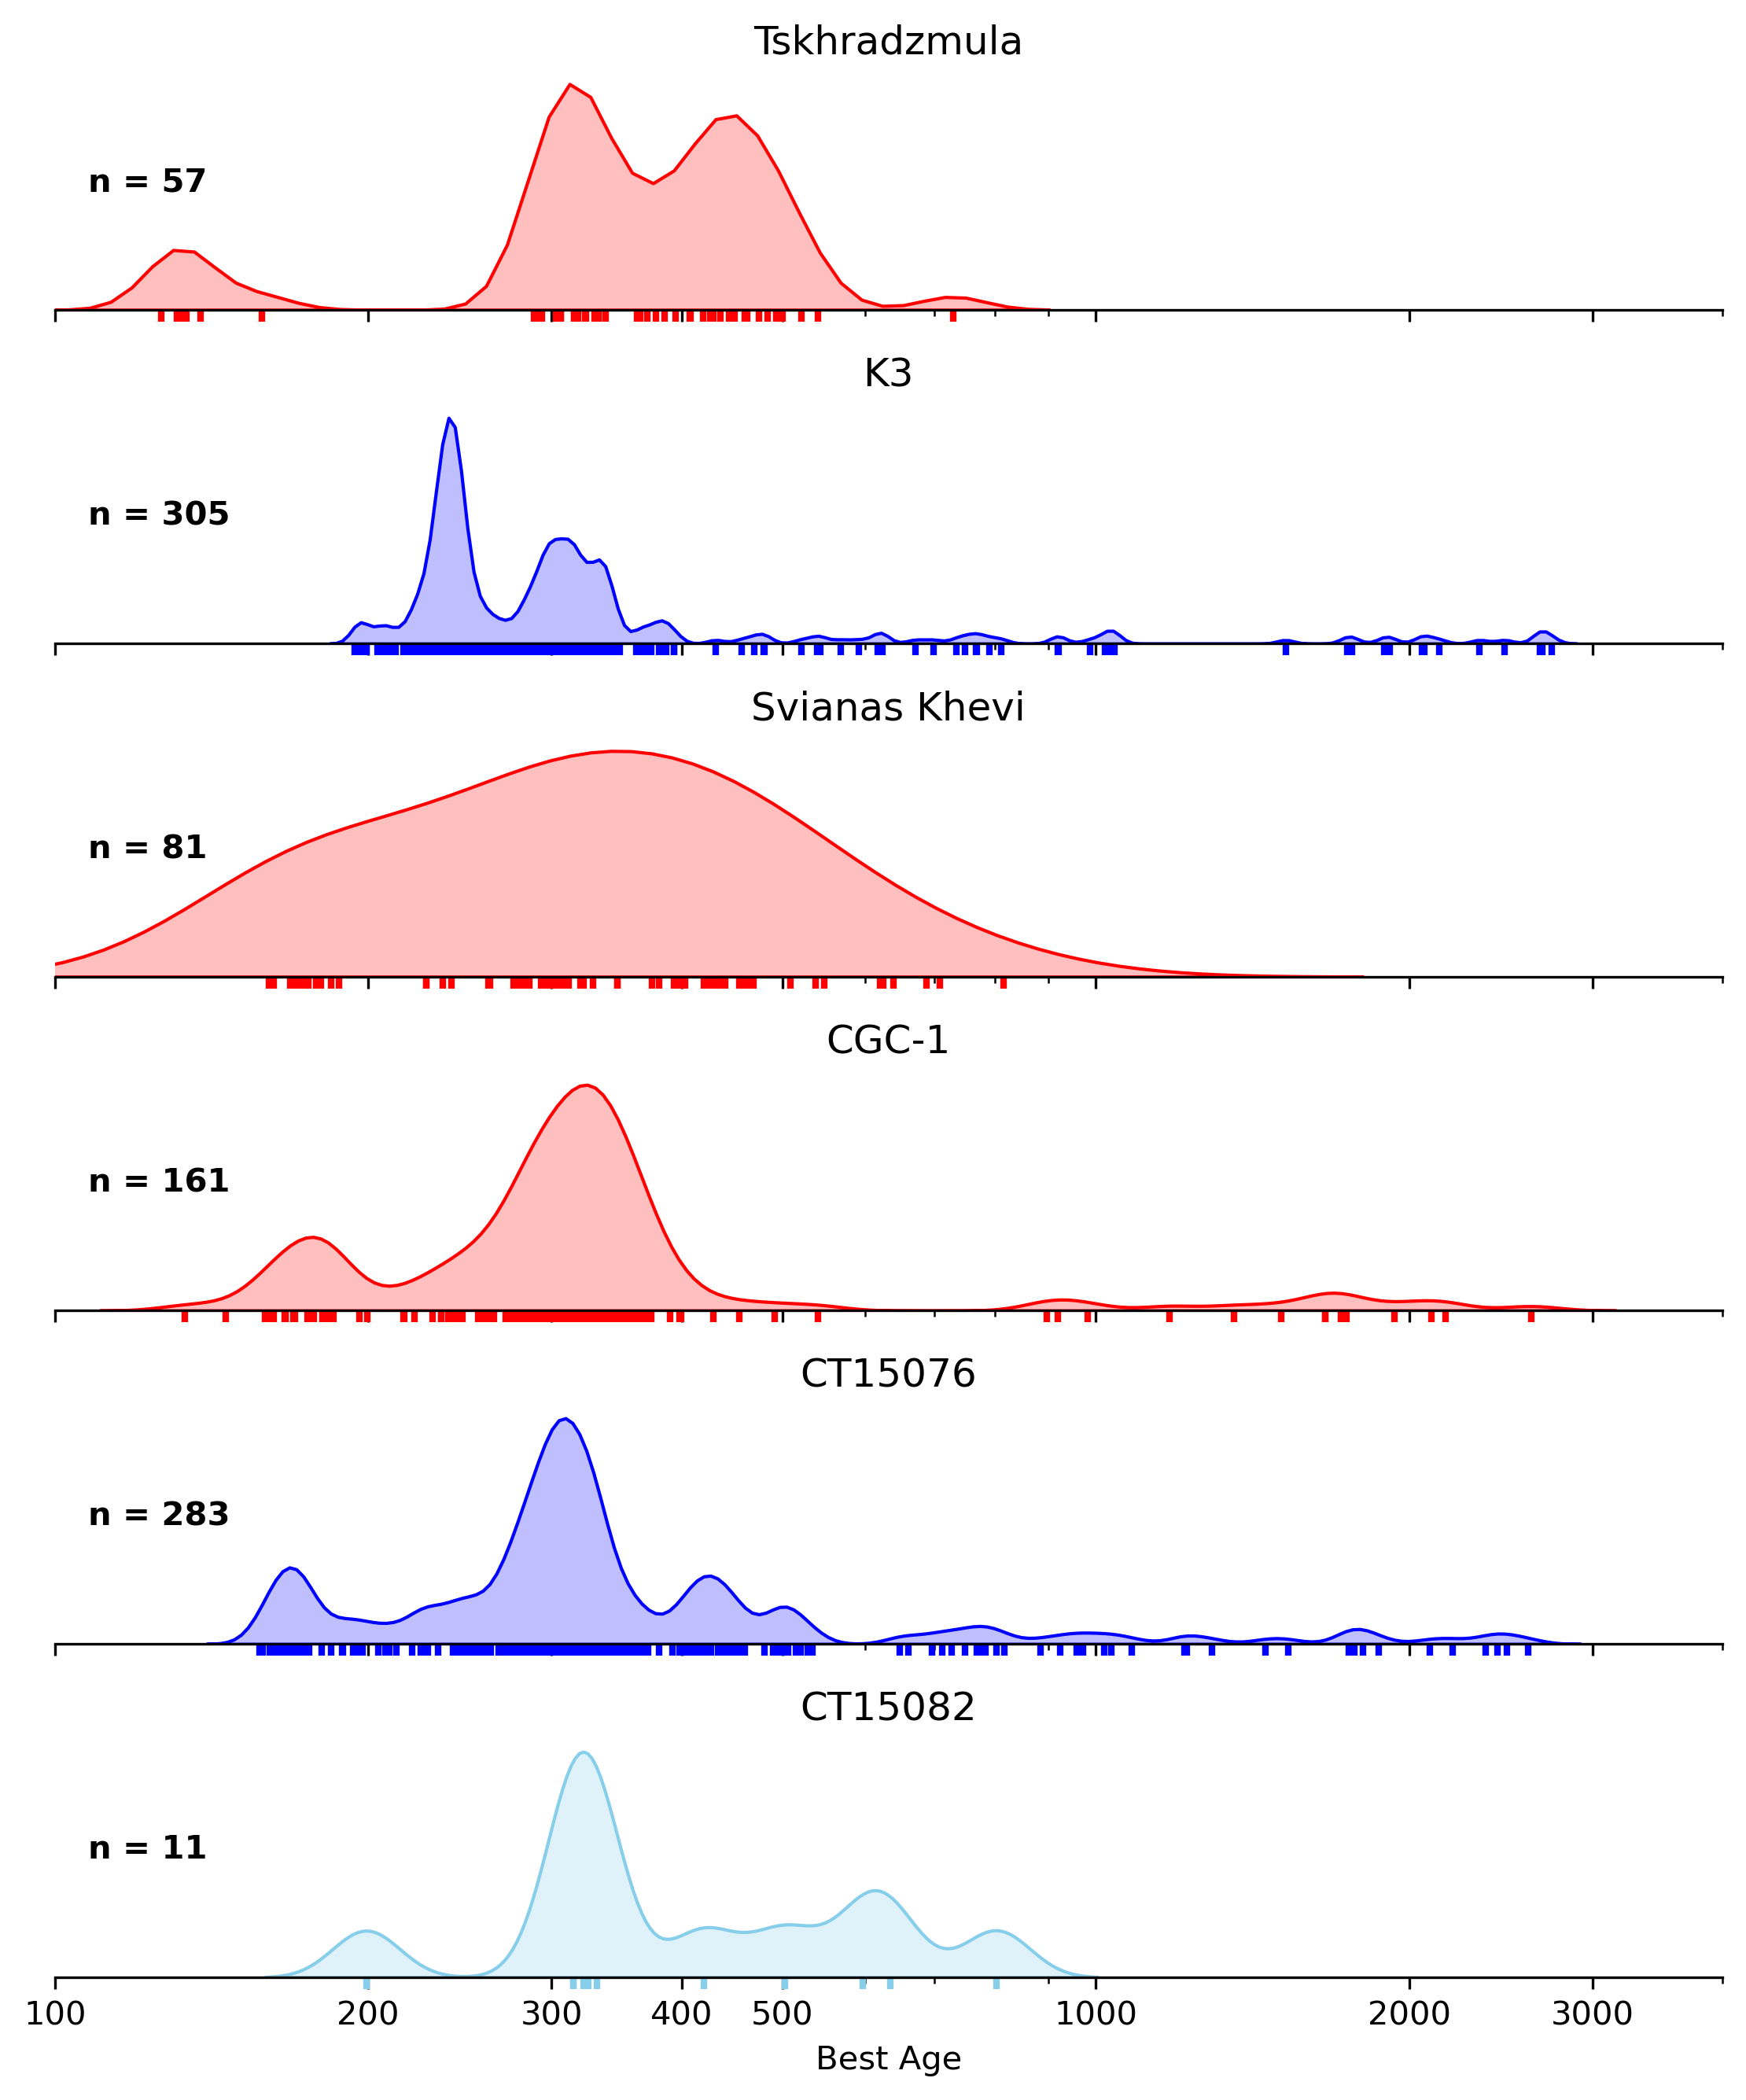

In [36]:
gvpas_names = ['K3','CT15076','CT15082','Tskhradzmula','Svianas Khevi','CGC-1']

gvpas_samples = plot_fault_block(gvpas_names,save=True,filename='gveleti_pasanuari_block.pdf')

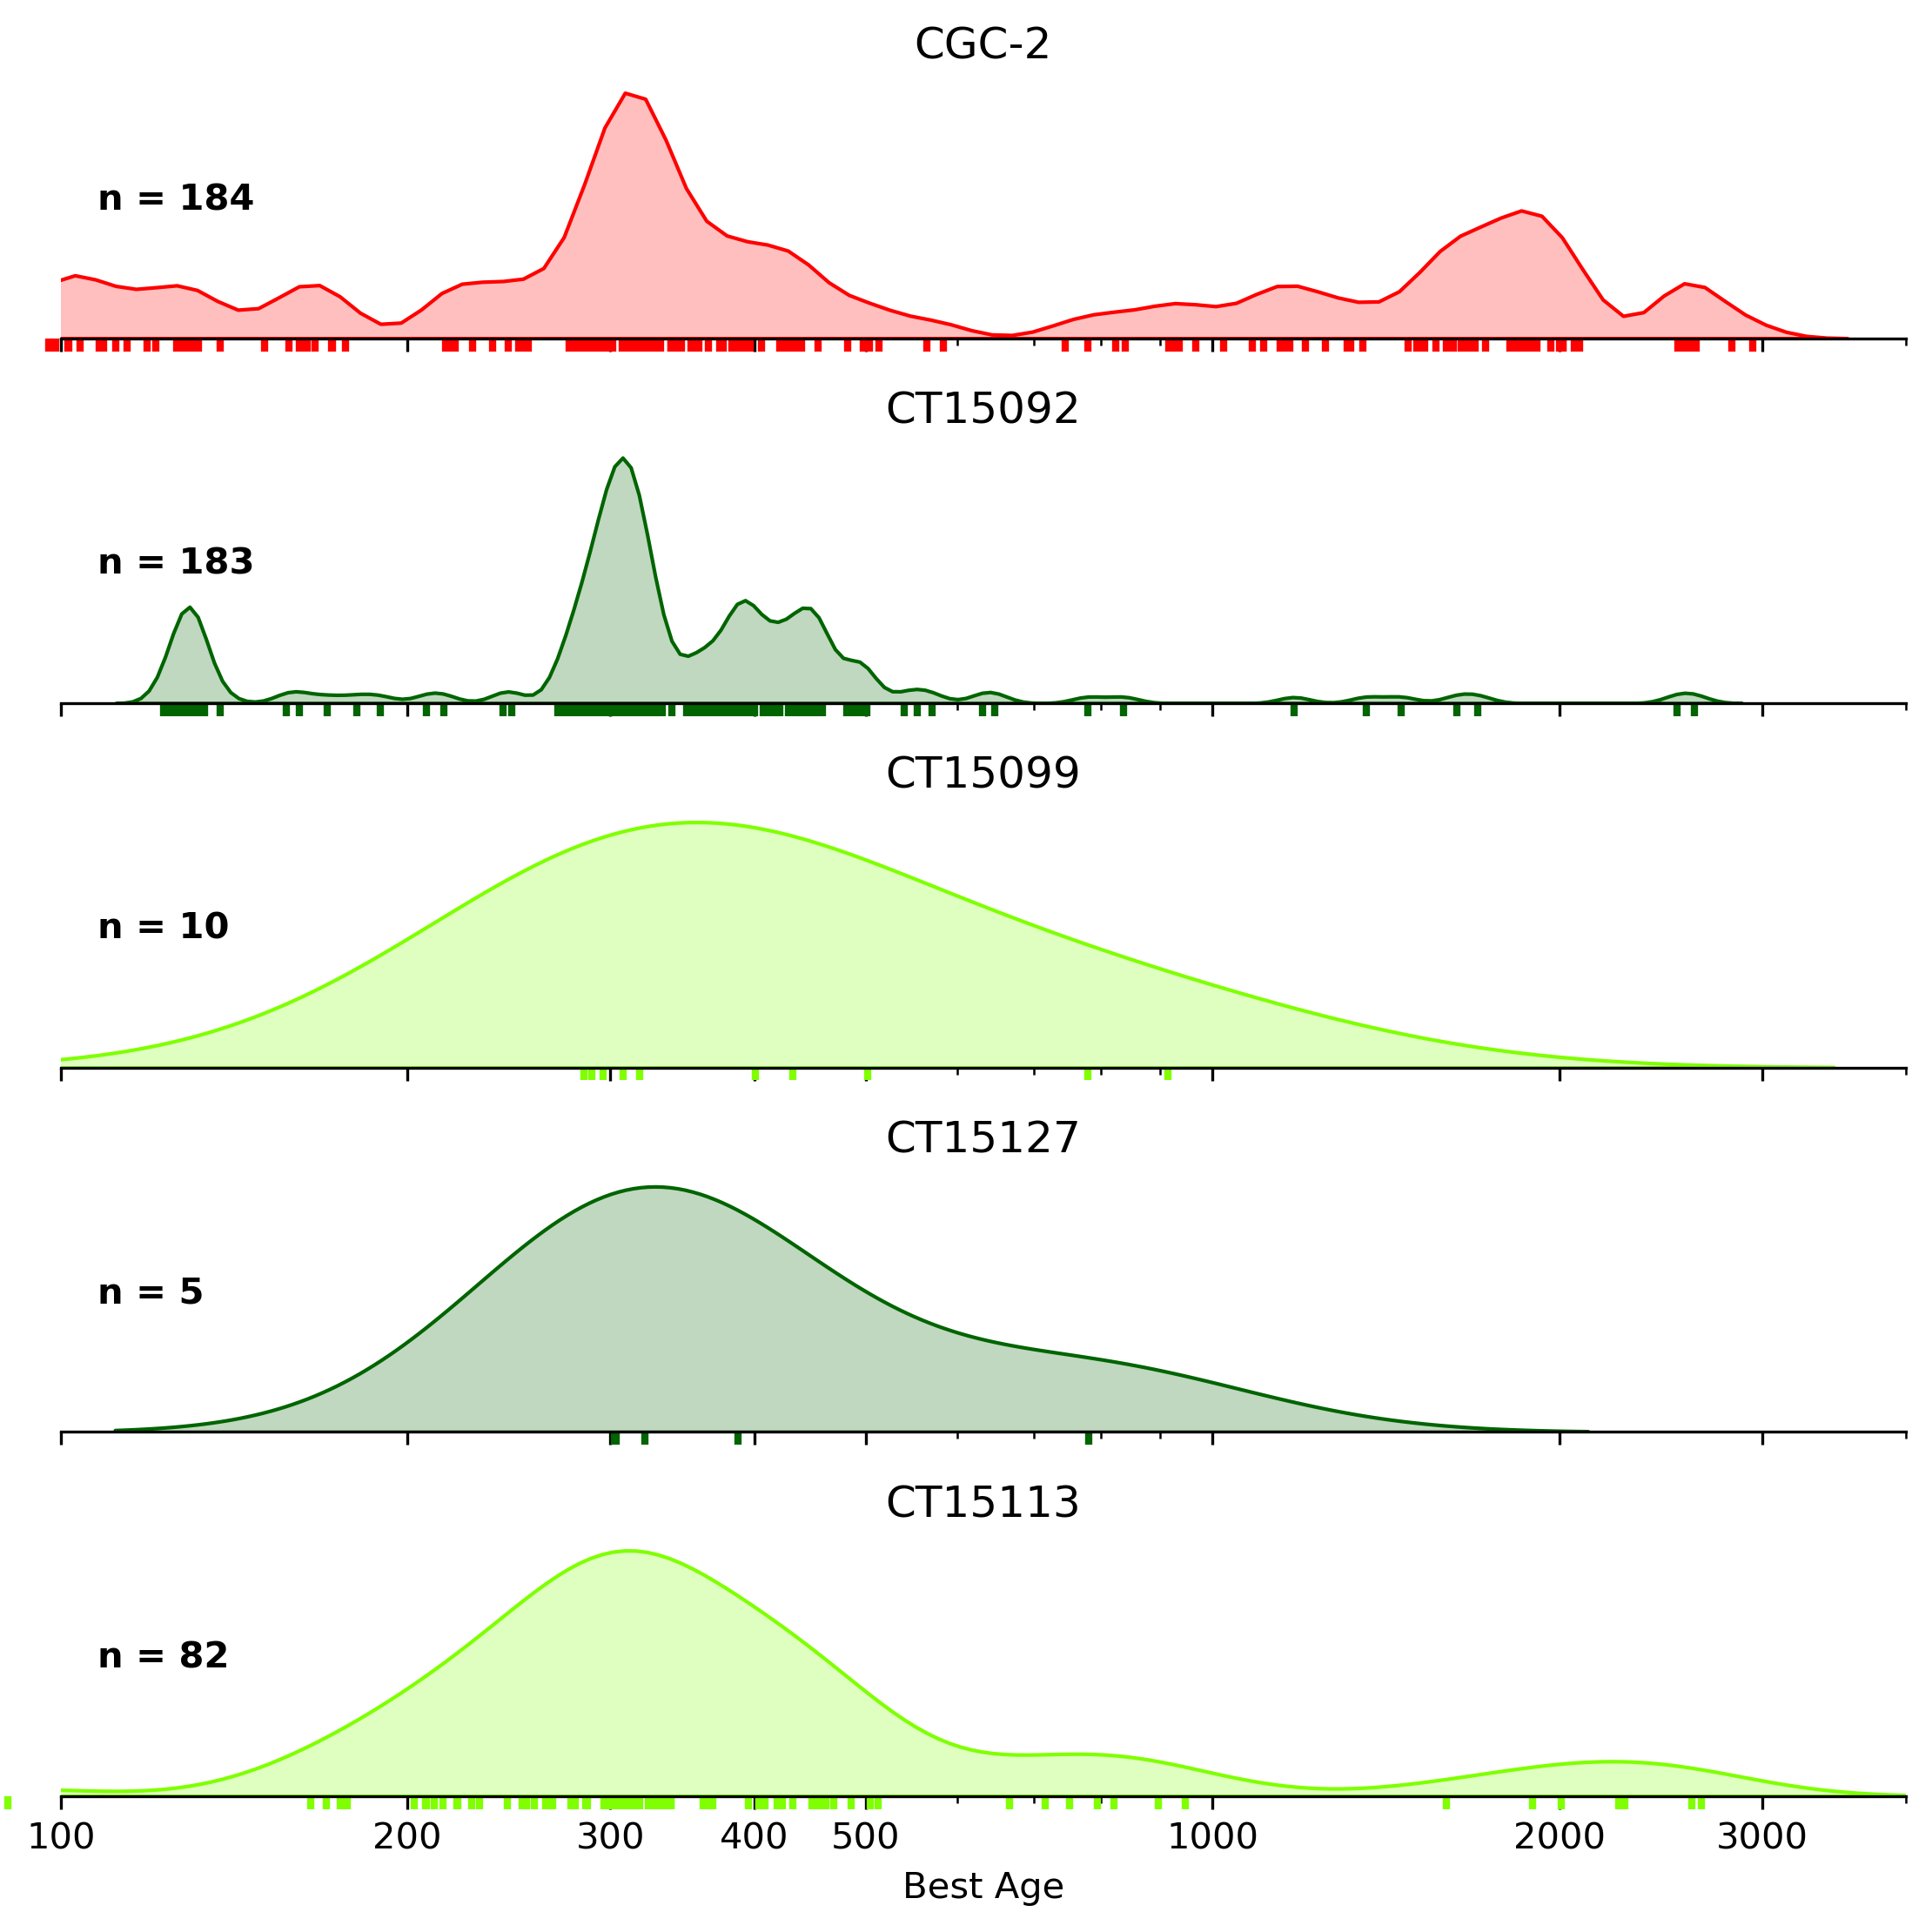

In [38]:
ana_names = ['CT15099','CT15092','CT15113','CT15127','CGC-2']

ana_samples = plot_fault_block(ana_names,save=True,filename='ananuri_block.pdf')

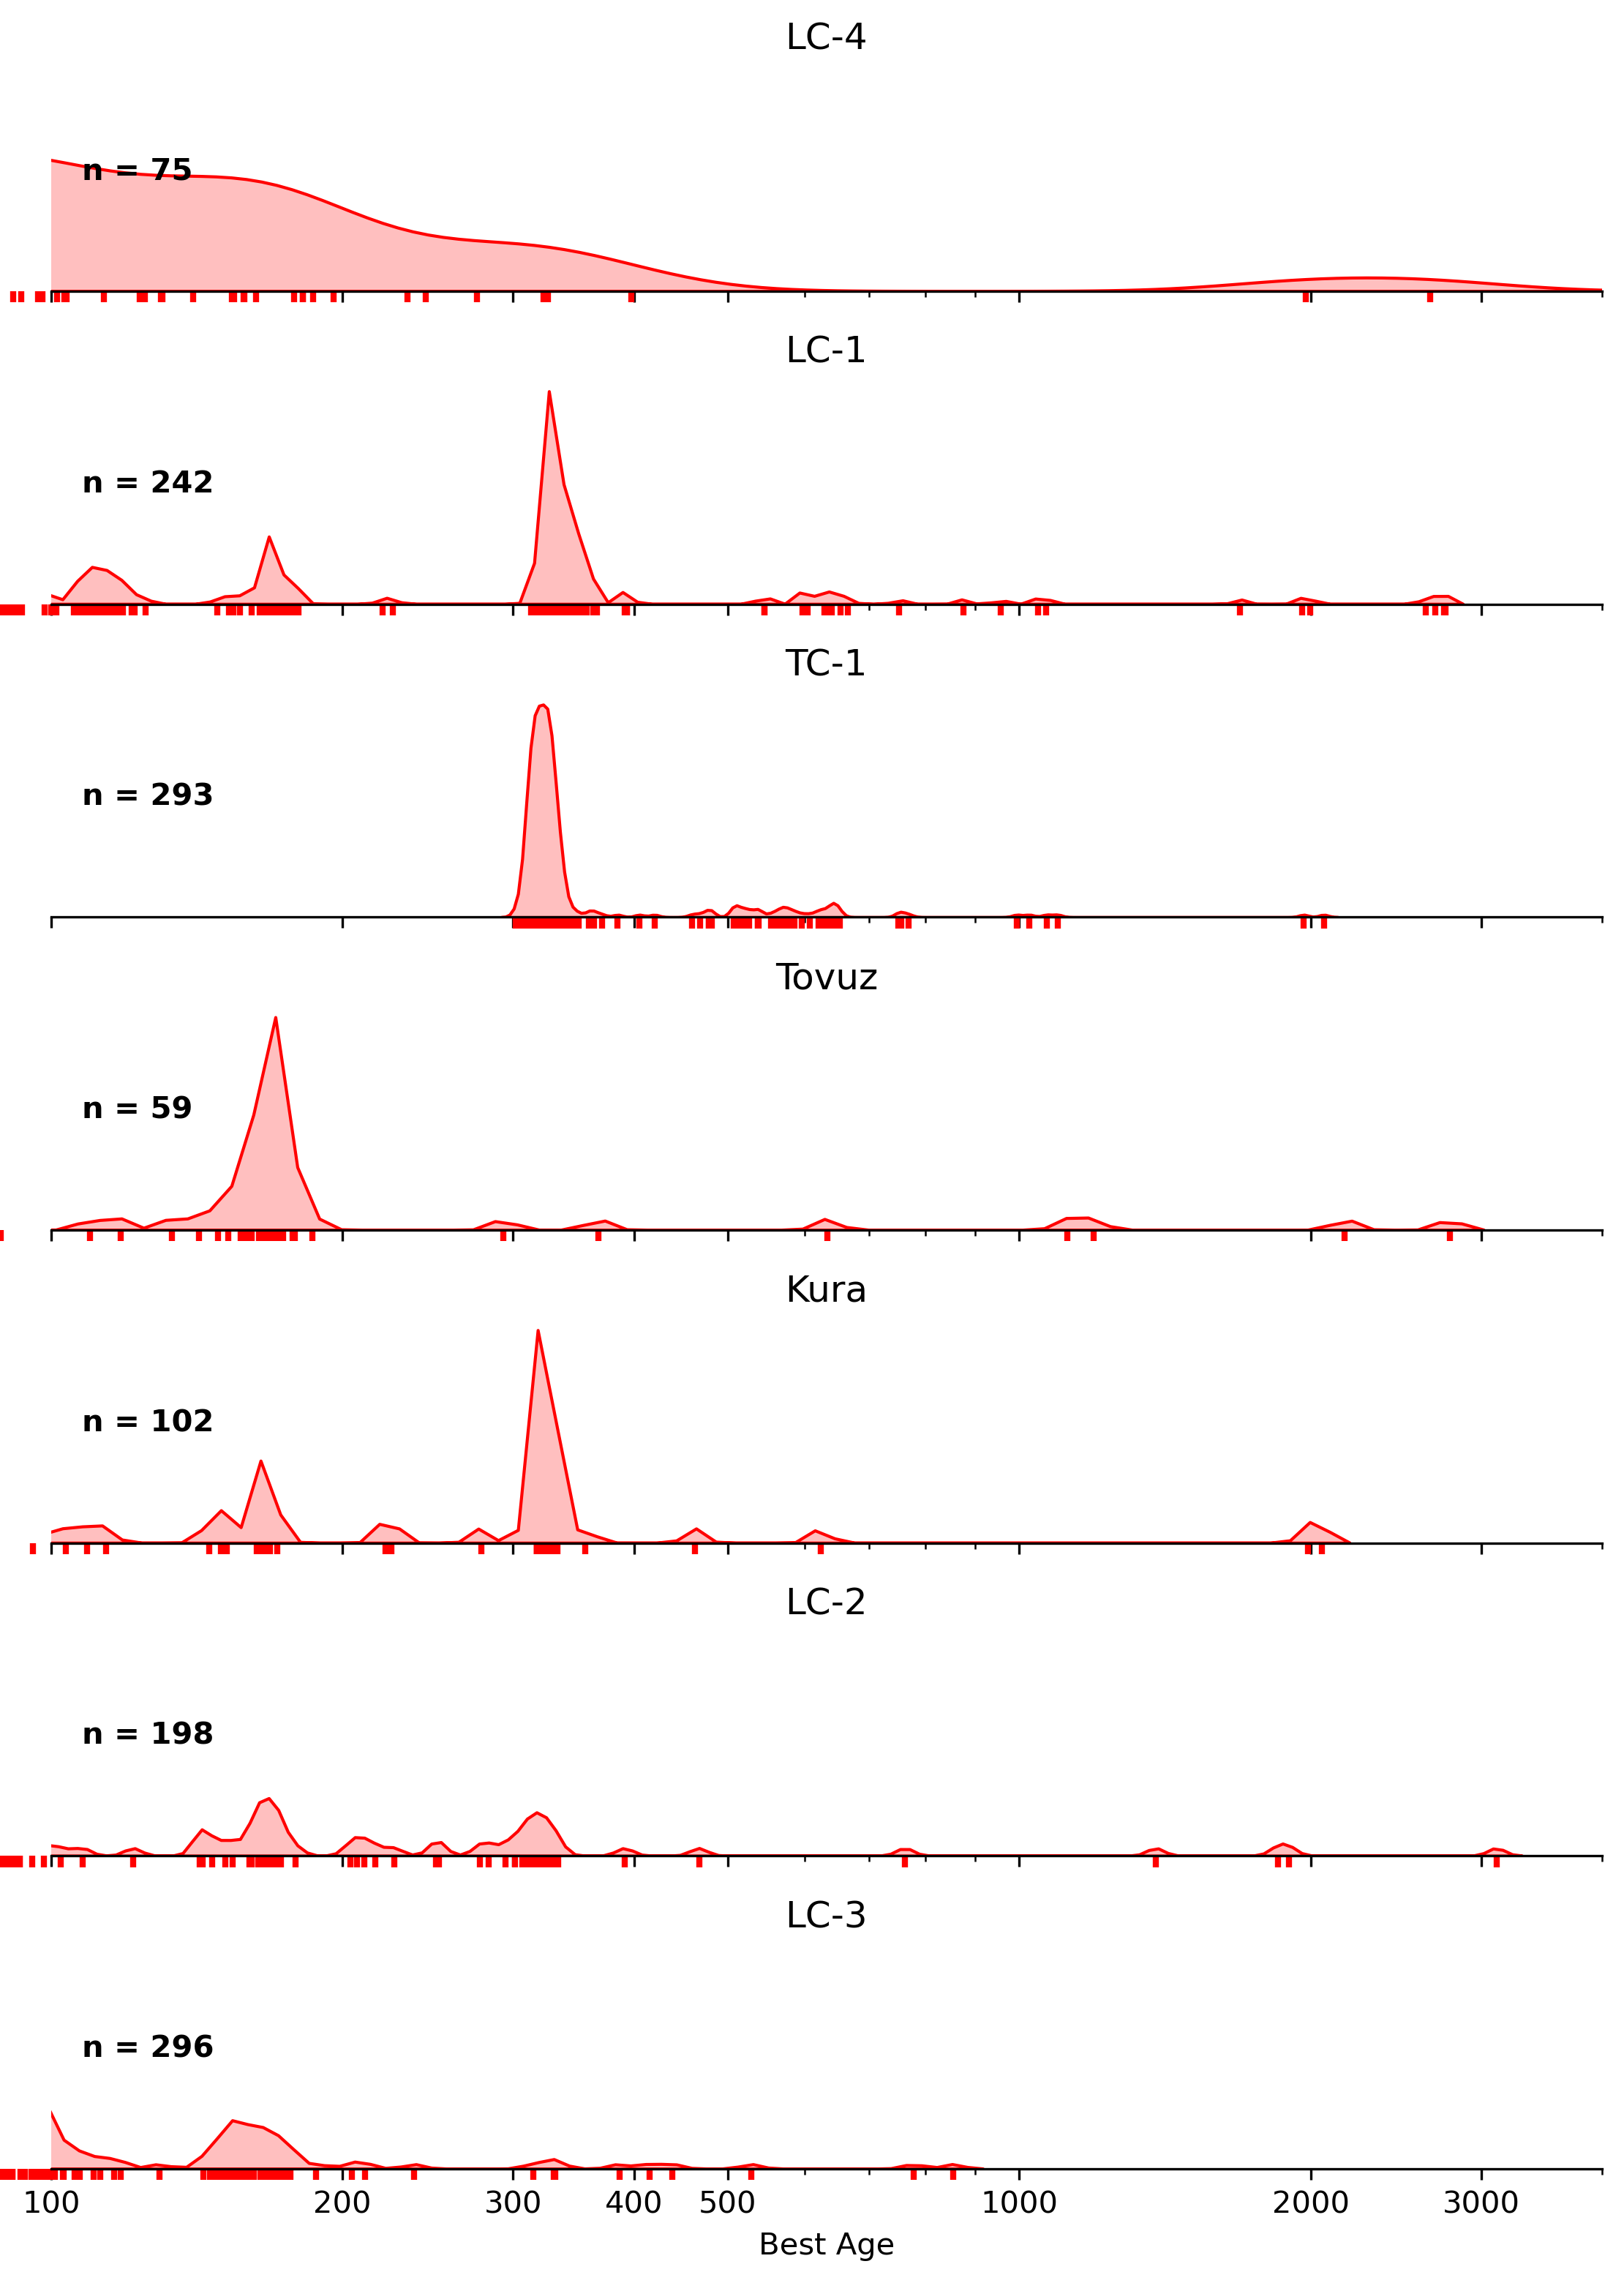

In [40]:
lc_names = ['Tovuz','LC-1','TC-1','LC-4','LC-2','LC-3','Kura']

lc_samples = plot_fault_block(lc_names,save=True,filename='LC.pdf')